In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_rows', 201)

In [3]:
pd.options.display.float_format = '{:.6f}'.format

In [4]:
train = pd.read_csv('./aihub_train.csv')
test = pd.read_csv('./aihub_valid.csv')

In [5]:
train.describe()

,표준어,제주어
count,2774257,2774257
unique,2372566,2389322
top,응,응
freq,27617,27472


In [6]:
test.describe()

,표준어,제주어
count,333802,333802
unique,294830,296387
top,응,응
freq,2669,2647


In [5]:
# 중복 제거
train = train.drop_duplicates()

In [6]:
test  = test.drop_duplicates()

In [9]:
train.describe()

,표준어,제주어
count,2398367,2398367
unique,2372566,2389322
top,그래서,게난
freq,180,36


In [10]:
test.describe()

,표준어,제주어
count,297173,297173
unique,294830,296387
top,그러니까,게난
freq,51,10


In [11]:
train[train['표준어']=='그래서'][['표준어','제주어']]

,표준어,제주어
6043,그래서,그래서
8466,그래서,그래그넹
10622,그래서,경해영
14222,그래서,경해그냉
15868,그래서,겅행
17099,그래서,경해부난
17341,그래서,겅해서
19962,그래서,경하난
20410,그래서,겅해부난
21434,그래서,거사


In [12]:
train[train['제주어']=='게난'][['표준어','제주어']]

,표준어,제주어
154,그러니까,게난
2434,그니까,게난
7094,그러니깐,게난
24224,게난,게난
37976,그니깐,게난
109312,그러게,게난
218388,그래서,게난
260045,그러니까.,게난
626371,그러니,게난
775932,그니가,게난


## 길이 살펴보기

In [11]:
train.loc[:,'s_len'] = train.loc[:,'표준어'].apply(lambda x: len(x))

In [12]:
train.loc[:,'j_len'] = train.loc[:,'제주어'].apply(lambda x: len(x))

In [305]:
train

,표준어,제주어,s_len,j_len
0,난 진짜 벌초 할때 뱀나오잖아 뱀도,난 진짜 벌초 할때 뱀나오잖아 뱀도,19,19
1,어어 그니까,어어 그니까,6,6
2,아 잘도,아 잘도,4,4
3,예초기 뱀도 짤려,예초기 뱀도 짤려,9,9
4,어 그니까 완전 끔찍해,어 그니까 완전 끔찍해,12,12
...,...,...,...,...
2774251,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,61,61
2774252,&name3&이 &name3&이가 그거 아니야 작은 거 가지고 있던데,&name3&이 &name3&이가 그거 아니 쬐그만한 거 가지고 있던데,38,39
2774253,어 맞아 나 좀 작은데,어 맞아 나 좀 쬐끄만한디,12,14
2774254,네가 그거인 거 같아.,네가 그거인 거 닮.,12,11


In [53]:
train.describe()

,s_len,j_len
count,2398367.000000,2398367.000000
mean,20.925002,20.585094
std,12.554869,12.414773
min,1.000000,1.000000
25%,11.000000,11.000000
50%,18.000000,18.000000
75%,28.000000,27.000000
max,340.000000,338.000000


In [95]:
for i in range(10,100,10):
    print(i,"이상",sum(train['s_len']>i)/len(train))

10 이상 0.7850362350716134
20 이상 0.4359616355628642
30 이상 0.19814440408828174
40 이상 0.07623895759072735
50 이상 0.02692665467795379
60 이상 0.009051575509502923
70 이상 0.0030858496635419014
80 이상 0.0011682949273401444
90 이상 0.00047240476540913044


In [96]:
for i in range(10,100,10):
    print(i,"이상",sum(train['j_len']>i)/len(train))

10 이상 0.7770520525007224
20 이상 0.4250725597875554
30 이상 0.1895694028478544
40 이상 0.07188849746515025
50 이상 0.025258436261005927
60 이상 0.008492862018198216
70 이상 0.002906977956251066
80 이상 0.0011019998190435409
90 이상 0.00044738774341041216


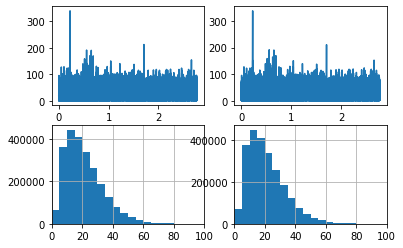

In [100]:
# 문장별 길이
plt.subplot(221)
plt.plot(train['s_len'])

plt.subplot(222)
plt.plot(train['j_len'])

#문장 길이별 문장 수
plt.subplot(223)
plt.hist(train['s_len'],bins=np.arange(0, 100, 5))
plt.xlim(0,100)
plt.grid(True)

plt.subplot(224)
plt.hist(train['j_len'],bins=np.arange(0, 100, 5))
plt.xlim(0,100)
plt.grid(True)

(0.0, 10.0)

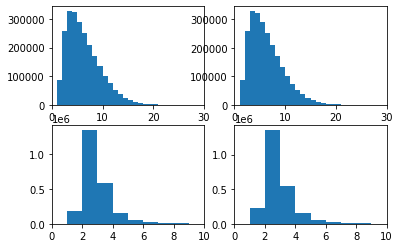

In [121]:
# 문장별 단어수(띄어쓰기 기준)
plt.subplot(221)
plt.hist(train['표준어'].str.split().map(lambda x : len(x)),bins=np.arange(0, 30, 1))
plt.xlim(0,30)

plt.subplot(222)
plt.hist(train['제주어'].str.split().map(lambda x : len(x)),bins=np.arange(0, 30, 1))
plt.xlim(0,30)

# 문장별 토큰 길이 평균
plt.subplot(223)
plt.hist(train['표준어'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)),bins=np.arange(0, 10, 1))
plt.xlim(0,10)

plt.subplot(224)
plt.hist(train['제주어'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)),bins=np.arange(0, 10, 1))
plt.xlim(0,10)


In [306]:
train['s_token_len_mean']=train['표준어'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

In [307]:
train['j_token_len_mean']=train['제주어'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

In [309]:
train[train['s_token_len_mean']>=6][['표준어','제주어']]

,표준어,제주어
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가)
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야
31,그 풀옆에(이)/(#이) 가기싫어(게)/(#게),그 풀옆에(이)/(#이) 가기싫어(게)/(#게)
35,그렇게하더라고,겅하더라고
43,귀찮아? {laughing},귀찮아? {laughing}
...,...,...
2774146,요즘도 많이 놀러가는(구먼)/(구나),요즘도 많이 놀러가는(구먼)/(구나)
2774150,제주도라도 가고(정)/(싶어) 하지#게,제주도라도 가고(정)/(싶어) 하주게
2774160,이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게),이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게)
2774214,((xx)) 재미(있언)/(있었어),((xx)) 재미(있언)/(있었어)


In [310]:
train[train['j_token_len_mean']>=6][['표준어','제주어']]

,표준어,제주어
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가)
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야
31,그 풀옆에(이)/(#이) 가기싫어(게)/(#게),그 풀옆에(이)/(#이) 가기싫어(게)/(#게)
43,귀찮아? {laughing},귀찮아? {laughing}
45,어어 {laughing},어어 {laughing}
...,...,...
2774146,요즘도 많이 놀러가는(구먼)/(구나),요즘도 많이 놀러가는(구먼)/(구나)
2774150,제주도라도 가고(정)/(싶어) 하지#게,제주도라도 가고(정)/(싶어) 하주게
2774160,이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게),이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게)
2774214,((xx)) 재미(있언)/(있었어),((xx)) 재미(있언)/(있었어)


In [311]:
train[(train['s_token_len_mean']>=6) | (train['j_token_len_mean']>=6)][['표준어','제주어']]

,표준어,제주어
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가)
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야
31,그 풀옆에(이)/(#이) 가기싫어(게)/(#게),그 풀옆에(이)/(#이) 가기싫어(게)/(#게)
35,그렇게하더라고,겅하더라고
43,귀찮아? {laughing},귀찮아? {laughing}
...,...,...
2774146,요즘도 많이 놀러가는(구먼)/(구나),요즘도 많이 놀러가는(구먼)/(구나)
2774150,제주도라도 가고(정)/(싶어) 하지#게,제주도라도 가고(정)/(싶어) 하주게
2774160,이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게),이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게)
2774214,((xx)) 재미(있언)/(있었어),((xx)) 재미(있언)/(있었어)


In [312]:
train['s_set'] = train.loc[:,'표준어'].str.split().apply(lambda x: set(x))
train['j_set'] = train.loc[:,'제주어'].str.split().apply(lambda x: set(x))

In [314]:
def f(x):
    return x[0].intersection(x[1])

In [315]:
train['intersection']= train[['s_set','j_set']].apply(f,axis=1)

In [316]:
def intersection_rate(x):
    return len(x[0])/len(x[1])

In [317]:
train['s_intersection_rate'] = train[['intersection','s_set']].apply(intersection_rate,axis=1)

In [318]:
train['j_intersection_rate'] = train[['intersection','j_set']].apply(intersection_rate,axis=1)

In [319]:
train[['s_intersection_rate','j_intersection_rate']].describe()

,s_intersection_rate,j_intersection_rate
count,2398367.000000,2398367.000000
mean,0.841530,0.842892
std,0.228263,0.226433
min,0.000000,0.000000
25%,0.750000,0.750000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


(array([[  51124.,    4200.,   26228.,   43711.,   32874.,  204178.,
          168995.,  178605.,  328772., 1359680.],
        [  51120.,    3433.,   24051.,   41875.,   30673.,  203463.,
          170100.,  180351.,  334188., 1359113.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

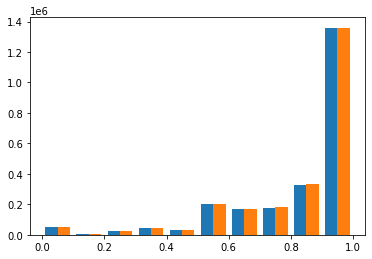

In [320]:
plt.hist(train[['s_intersection_rate','j_intersection_rate']])

In [321]:
len(train)-(train['s_intersection_rate']==train['j_intersection_rate']).sum()

73428

In [322]:
train[train['표준어']==train['제주어']]

,표준어,제주어,s_len,j_len,s_token_len_mean,j_token_len_mean,s_set,j_set,intersection,s_intersection_rate,j_intersection_rate
0,난 진짜 벌초 할때 뱀나오잖아 뱀도,난 진짜 벌초 할때 뱀나오잖아 뱀도,19,19,2.333333,2.333333,"{진짜, 벌초, 뱀도, 난, 뱀나오잖아, 할때}","{진짜, 벌초, 뱀도, 난, 뱀나오잖아, 할때}","{진짜, 벌초, 뱀도, 난, 뱀나오잖아, 할때}",1.000000,1.000000
1,어어 그니까,어어 그니까,6,6,2.500000,2.500000,"{그니까, 어어}","{그니까, 어어}","{어어, 그니까}",1.000000,1.000000
2,아 잘도,아 잘도,4,4,1.500000,1.500000,"{아, 잘도}","{아, 잘도}","{아, 잘도}",1.000000,1.000000
3,예초기 뱀도 짤려,예초기 뱀도 짤려,9,9,2.333333,2.333333,"{짤려, 뱀도, 예초기}","{짤려, 뱀도, 예초기}","{짤려, 뱀도, 예초기}",1.000000,1.000000
4,어 그니까 완전 끔찍해,어 그니까 완전 끔찍해,12,12,2.250000,2.250000,"{어, 끔찍해, 그니까, 완전}","{어, 끔찍해, 그니까, 완전}","{완전, 어, 그니까, 끔찍해}",1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2774242,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,24,24,4.000000,4.000000,"{응, 쏠쏠(한게)/(하다), 다니느, 재미가, 회사}","{응, 쏠쏠(한게)/(하다), 다니느, 재미가, 회사}","{응, 쏠쏠(한게)/(하다), 다니느, 재미가, 회사}",1.000000,1.000000
2774244,보드게임 중에서도 막 오래 걸리는 게임들 이런 것도 코로나 때문에 요즘 집에서 막,보드게임 중에서도 막 오래 걸리는 게임들 이런 것도 코로나 때문에 요즘 집에서 막,45,45,2.538462,2.538462,"{오래, 집에서, 이런, 걸리는, 때문에, 것도, 요즘, 코로나, 중에서도, 막, ...","{오래, 집에서, 이런, 걸리는, 때문에, 것도, 요즘, 코로나, 중에서도, 막, ...","{오래, 집에서, 이런, 걸리는, 때문에, 것도, 요즘, 중에서도, 코로나, 막, ...",1.000000,1.000000
2774247,카드 게임 {laughing},카드 게임 {laughing},16,16,4.666667,4.666667,"{{laughing}, 카드, 게임}","{{laughing}, 카드, 게임}","{카드, 게임, {laughing}}",1.000000,1.000000
2774251,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,61,61,2.875000,2.875000,"{뭐냐, 다닐, 수도, 그리고, 루미큐브도, 작은, 다니고, 요즘, 것도, 루미큐브...","{뭐냐, 다닐, 수도, 그리고, 루미큐브도, 작은, 다니고, 요즘, 것도, 루미큐브...","{뭐냐, 다닐, 그리고, 루미큐브도, 작은, 다니고, 요즘, 것도, 루미큐브, 거,...",1.000000,1.000000


In [323]:
1281978/len(train)

0.5345211971312147

# 데이터 살펴보기

In [8]:
# '{' 또는 '}' 포함 문장 
train[(train['표준어'].str.contains('{|}'))|(train['제주어'].str.contains('{|}'))][['표준어','제주어']]

,표준어,제주어
43,귀찮아? {laughing},귀찮아? {laughing}
45,어어 {laughing},어어 {laughing}
75,없어서 벌초할사람 없어서 진짜 저 다 납골당{laughing} 같은데,어서그네 벌초할사람 어선 진짜 저 다 납골당{laughing} 같은데
141,나때는 있지만 {laughing} 나때는 있지만 이 &name1&때는 없을수도 있어,나때는 있지만 {laughing} 나때는 있지만 이 &name1&때는 없을수도 있어
142,그 그러니까 너도 이 아들 많이 낳아 {laughing},그 그러니까 너도 이 아들 많이 낳으라게 {laughing}
...,...,...
2774219,{laughing} 다 들(켠)/(켰어) 다 죽었어,{laughing} 다 들(켠)/(켰어) 다 죽언
2774221,어디(간)/(갔어) {laughing} 누가 거짓말 못하고 이런 거 다 알아 이제는,어디(간)/(갔어) {laughing} 누가 거짓말 못하고 이런 거 다 알아 이젠
2774229,쟤 당황(행)/(해서)(그넹)/(#그넹) 간다 이렇게 하는 거 아니야 어 {laug...,자이 당황(행)/(해서)(그넹)/(#그넹) 감쪄 영 하는 거 아니 어 {laughing}
2774246,나 집에 할리갈리 있어 루미큐브도 있어 할리갈리는 보드게임이 아니야 {laughing},나 집에 할리갈리 이서 루미큐브도 이서 할리갈리는 보드게임이 아니야 {laughing}


In [18]:
# '{','}' 둘다 포함 문장
train[(train['표준어'].str.contains('{\S*}'))|(train['제주어'].str.contains('{\S*}'))][['표준어','제주어']]

,표준어,제주어
43,귀찮아? {laughing},귀찮아? {laughing}
45,어어 {laughing},어어 {laughing}
75,없어서 벌초할사람 없어서 진짜 저 다 납골당{laughing} 같은데,어서그네 벌초할사람 어선 진짜 저 다 납골당{laughing} 같은데
141,나때는 있지만 {laughing} 나때는 있지만 이 &name1&때는 없을수도 있어,나때는 있지만 {laughing} 나때는 있지만 이 &name1&때는 없을수도 있어
142,그 그러니까 너도 이 아들 많이 낳아 {laughing},그 그러니까 너도 이 아들 많이 낳으라게 {laughing}
...,...,...
2774219,{laughing} 다 들(켠)/(켰어) 다 죽었어,{laughing} 다 들(켠)/(켰어) 다 죽언
2774221,어디(간)/(갔어) {laughing} 누가 거짓말 못하고 이런 거 다 알아 이제는,어디(간)/(갔어) {laughing} 누가 거짓말 못하고 이런 거 다 알아 이젠
2774229,쟤 당황(행)/(해서)(그넹)/(#그넹) 간다 이렇게 하는 거 아니야 어 {laug...,자이 당황(행)/(해서)(그넹)/(#그넹) 감쪄 영 하는 거 아니 어 {laughing}
2774246,나 집에 할리갈리 있어 루미큐브도 있어 할리갈리는 보드게임이 아니야 {laughing},나 집에 할리갈리 이서 루미큐브도 이서 할리갈리는 보드게임이 아니야 {laughing}


In [19]:
# '(' 또는 ')' 포함 문장
train[(train['표준어'].str.contains('\(|\)'))|(train['제주어'].str.contains('\(|\)'))][['표준어','제주어']]

,표준어,제주어
9,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가)
17,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야
29,아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐),아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐)
...,...,...
2774242,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,회사 다니느 재미가 쏠쏠(한게)/(하다) 응
2774245,두 명 이 인용 보드게임 이런 것도 매우 잘 팔린(댄)/(대),두 명 이 인용 보드게임 이런 것도 잘도 잘 팔린(댄)/(대)
2774248,어 루미큐브 재밌지 큐브가 어 그것도 조커 두 개만 있는 줄 알았는데 여러 가지 있...,어 루미큐브 재밌지 큐브가 어 것도 조커 두 개만 있는 줄 알았는데 여러 가지 있더...
2774250,색깔 반전 시키는 것도 있다고 하고(이)/(#이),색깔 반전 시키는 것도 있댄 하고(이)/(#이)


In [20]:
# "(",")" 둘다 포함 문장
train[(train['표준어'].str.contains('\(\S*\)'))|(train['제주어'].str.contains('\(\S*\)'))][['표준어','제주어']]

,표준어,제주어
9,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가)
17,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야
29,아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐),아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐)
...,...,...
2774242,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,회사 다니느 재미가 쏠쏠(한게)/(하다) 응
2774245,두 명 이 인용 보드게임 이런 것도 매우 잘 팔린(댄)/(대),두 명 이 인용 보드게임 이런 것도 잘도 잘 팔린(댄)/(대)
2774248,어 루미큐브 재밌지 큐브가 어 그것도 조커 두 개만 있는 줄 알았는데 여러 가지 있...,어 루미큐브 재밌지 큐브가 어 것도 조커 두 개만 있는 줄 알았는데 여러 가지 있더...
2774250,색깔 반전 시키는 것도 있다고 하고(이)/(#이),색깔 반전 시키는 것도 있댄 하고(이)/(#이)


In [21]:
# '()' 포함 문장
train[(train['표준어'].str.contains('\(\)'))|(train['제주어'].str.contains('\(\)'))][['표준어','제주어']]

,표준어,제주어
99,일일이 산소 못하(()),일일이 산소 못하(())
187,(())없다는거야,(())없대는거라
252,다 모여서 (())구나 어,다 모영 (())구나 어
276,명절 때 우리 오빠는 새옷을 별로 (())같아,명절 때 우리 오빠는 새옷을 별로 (())닮아
294,얻어 신(()),얻어 신(())
...,...,...
2774223,(()) 맞아 표정 숨길 수 있어서 매우 좋아,(()) 맞아 표정 숨길 수 있어서 잘도 좋아
2774233,이어 붙이면서 예를 들어서 우리 막 (()) 부심 같은 거 부리거든,이어 붙이면서 예를 들어서 우리 막 (()) 부심 같은 거 부리거든
2774234,(()) 조금 이제 조금 매운 걸 먹었어,(()) 조금 이제 조금 매운 걸 먹었어
2774235,그런데 누구 막 물 마시러 (()) 물 마시러 가시는 거 아니죠 막 이런 식,그런데 누구 막 물 마시러 (()) 물 마시러 가시는 거 아니죠 막 이런 식


In [22]:
#문장 중간에 '.' 있는 경우
train[(train['표준어'].str.contains('\.\S+'))|(train['제주어'].str.contains('\.\S+'))][['표준어','제주어']]

,표준어,제주어
1198,모르겠어.,모르쿠다..
1444,아닙니다.아닙니다.,아니우다.아니우다.
1445,아니 아니다.{laughing},아니 아니다.{laughing}
1499,싫어.{laughing},싫어.{laughing}
3658,차 버렸대. 안(된댄.)/(된대.),차 부렀댄. 안(된댄.)/(된대.)
...,...,...
2773919,새 거면 당근에 팔아(부러.)/(버려.),새 거면 당근에 팔아(부러.)/(버려.)
2773936,살 쪄(부난)/(서) 걱정(이주.)/(지.),살 쪄(부난)/(서) 걱정(이주.)/(지.)
2774022,경연 -순- 사실 이거 듣는 어떤 무대라는 게 (())하는데 순서도 완전 중요한 영...,경연 -순- 사실 이거 듣는 어떤 무대라는 게 (())하는데 순서도 완전 중요한 영...
2774028,그런 거 가지고도 얘기가 많(안.)/(았어.),그런 거 가지고도 얘기가 많(안.)/(았어.)


In [19]:
# '/(( | /))' 포함 문장
train[(train['표준어'].str.contains('/\(\(|\)\)/'))|(train['제주어'].str.contains('/\(\(|\)\)/'))][['표준어','제주어']]

,표준어,제주어
83441,((언?))/((없어?)),((언?))/((없어?))
107419,거기 앞에서 ((걍)/(그냥))/(그냥) 풀어줬어.,거기 앞에서 ((걍)/(그냥))/(그냥) 풀어줜.
107420,((걍)/(그냥))/(그냥) 풀어줬어 그럼 또 오네.,((걍)/(그냥))/(그냥) 풀어줜 그럼 또 오네.
107456,나 지 ((걍)/(그냥))/(그냥) 그만 둬 그런데 이모한테도 이제 온 거지.,나 지 ((걍)/(그냥))/(그냥) 그만 둬 그런데 이모한테도 이제 온 거지.
107656,어 거기선 위험해 왜냐하면 삐끗하면 ((걍)/(그냥))/(그냥) 아래로 쭉 내려 받...,어 거기선 위험해 왜냐하면 삐끗하면 ((걍)/(그냥))/(그냥) 아래로 쭉 내려 받...
107712,닭똥집은 ((걍)/(그냥))/(그냥),닭똥집은 ((걍)/(그냥))/(그냥)
107946,줄 끊어지면 ((걍)/(그냥))/(그냥) 바로 가는 거니까.,줄 끊어지면 ((걍)/(그냥))/(그냥) 바로 가는 거니까.
121041,추천으로 웬만하면 다 일치하지 ((않애?))/((않니?)),추천으로 웬만하면 다 일치하지 ((않애?))/((않니?))
182717,신부 상은 여러번 ((들렀주양.))/((받았죠)) 큰 며느리니까 #양,새각시 상은 여러번 ((들렀주양.))/((받았죠)) 큰 며느리난 양
282206,((겐디))/(그런데) 그걸 그냥 보고 못지나쳐,((겐디))/(그런데) 그걸 그냥 보고 못지나쳐


In [22]:
# '(( | ))' 포함 문장
train[(train['표준어'].str.contains('\(\(|\)\)'))|(train['제주어'].str.contains('\(\(|\)\)'))][['표준어','제주어']]

,표준어,제주어
99,일일이 산소 못하(()),일일이 산소 못하(())
187,(())없다는거야,(())없대는거라
252,다 모여서 (())구나 어,다 모영 (())구나 어
276,명절 때 우리 오빠는 새옷을 별로 (())같아,명절 때 우리 오빠는 새옷을 별로 (())닮아
294,얻어 신(()),얻어 신(())
...,...,...
2774223,(()) 맞아 표정 숨길 수 있어서 매우 좋아,(()) 맞아 표정 숨길 수 있어서 잘도 좋아
2774233,이어 붙이면서 예를 들어서 우리 막 (()) 부심 같은 거 부리거든,이어 붙이면서 예를 들어서 우리 막 (()) 부심 같은 거 부리거든
2774234,(()) 조금 이제 조금 매운 걸 먹었어,(()) 조금 이제 조금 매운 걸 먹었어
2774235,그런데 누구 막 물 마시러 (()) 물 마시러 가시는 거 아니죠 막 이런 식,그런데 누구 막 물 마시러 (()) 물 마시러 가시는 거 아니죠 막 이런 식


In [7]:
# {laughing},(()), 맨앞 점, 마침표 제거
def preprocessing(x):
    x = re.sub('({\S+)ing(\S*})',"",x)
    x = re.sub('\(\([^#\w]*\)\)','',x) # (()) 안에 #이나 문자가 아니면 삭제
    x = re.sub('^\.','',x)
    x = re.sub('\.$','',x)
    x = re.sub('{','',x)
    x = re.sub('}','',x)
    return x

In [8]:
train['표준어'] = train['표준어'].apply(preprocessing)
train['제주어'] = train['제주어'].apply(preprocessing)

In [10]:
train[(train['표준어'].str.contains('\(\(|\)\)'))|(train['제주어'].str.contains('\(\(|\)\)'))][['표준어','제주어']]

,표준어,제주어
596,((이제여행))다녀(불잖아?)/(버리잖아?),((이제여행))다녀(불잖아?)/(버리잖아?)
838,하루에 몇 시간을 달((xxxxxxxx)),하루에 몇 시간을 달((xxxxxxxx))
847,((x)) 학교 안 나와,((x)) 학교 안 나와
853,엄청 ((xxx)) 까먹을 정도로 그런데 무슨 교육 받으러 간다는데,엄청 ((xxx)) 까먹을 정도로 그런데 무슨 교육 받으러 간다는데
861,((xxx?)),((xxx?))
...,...,...
2773842,((xx)) 이거 많고 많지#게,((xx)) 이거 싸고 쌌져게
2774044,이렇게 ((생각)),이렇게 ((생각))
2774110,가야((x)),가야((x))
2774133,만약에 동서울에서 출발하면 여기 ((xx)) 아이씨에서 내리면 훨씬 가까,만약에 동서울에서 출발하면 여기 ((xx)) 아이씨에서 내리면 훨씬 가까


In [11]:
train[(train['표준어'].str.contains('/\(\(|\)\)/'))|(train['제주어'].str.contains('/\(\(|\)\)/'))][['표준어','제주어']]

,표준어,제주어
83441,((언?))/((없어?)),((언?))/((없어?))
107419,거기 앞에서 ((걍)/(그냥))/(그냥) 풀어줬어,거기 앞에서 ((걍)/(그냥))/(그냥) 풀어줜
107420,((걍)/(그냥))/(그냥) 풀어줬어 그럼 또 오네,((걍)/(그냥))/(그냥) 풀어줜 그럼 또 오네
107456,나 지 ((걍)/(그냥))/(그냥) 그만 둬 그런데 이모한테도 이제 온 거지,나 지 ((걍)/(그냥))/(그냥) 그만 둬 그런데 이모한테도 이제 온 거지
107656,어 거기선 위험해 왜냐하면 삐끗하면 ((걍)/(그냥))/(그냥) 아래로 쭉 내려 받...,어 거기선 위험해 왜냐하면 삐끗하면 ((걍)/(그냥))/(그냥) 아래로 쭉 내려 받...
107712,닭똥집은 ((걍)/(그냥))/(그냥),닭똥집은 ((걍)/(그냥))/(그냥)
107946,줄 끊어지면 ((걍)/(그냥))/(그냥) 바로 가는 거니까,줄 끊어지면 ((걍)/(그냥))/(그냥) 바로 가는 거니까
121041,추천으로 웬만하면 다 일치하지 ((않애?))/((않니?)),추천으로 웬만하면 다 일치하지 ((않애?))/((않니?))
182717,신부 상은 여러번 ((들렀주양.))/((받았죠)) 큰 며느리니까 #양,새각시 상은 여러번 ((들렀주양.))/((받았죠)) 큰 며느리난 양
282206,((겐디))/(그런데) 그걸 그냥 보고 못지나쳐,((겐디))/(그런데) 그걸 그냥 보고 못지나쳐


In [12]:
train['s_re'] = train['표준어'].str.findall('\(([^\)]*\w+[^\)]*)\)/?\(([^\)]*\w+[^\)]*)\)')
train['j_re'] = train['제주어'].str.findall('\(([^\)]*\w+[^\)]*)\)/?\(([^\)]*\w+[^\)]*)\)')

In [14]:
temp = train[train['s_re'].apply(lambda x:len(x)!=0)]
temp

,표준어,제주어,s_re,j_re
9,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고,"[(이, #이)]","[(이, #이)]"
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가),"[(하다그네, 하다가)]","[(하다그네, 하다가)]"
17,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가,"[(이, #이)]","[(이, #이)]"
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야,"[(이, #이)]","[(이, #이)]"
29,아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐),아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐),"[(나올카부덴이, 나올까봐)]","[(나올카부덴이, 나올까봐)]"
...,...,...,...,...
2774242,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,"[(한게, 하다)]","[(한게, 하다)]"
2774245,두 명 이 인용 보드게임 이런 것도 매우 잘 팔린(댄)/(대),두 명 이 인용 보드게임 이런 것도 잘도 잘 팔린(댄)/(대),"[(댄, 대)]","[(댄, 대)]"
2774248,어 루미큐브 재밌지 큐브가 어 그것도 조커 두 개만 있는 줄 알았는데 여러 가지 있...,어 루미큐브 재밌지 큐브가 어 것도 조커 두 개만 있는 줄 알았는데 여러 가지 있더...,"[(이, #이)]","[(이, #이)]"
2774250,색깔 반전 시키는 것도 있다고 하고(이)/(#이),색깔 반전 시키는 것도 있댄 하고(이)/(#이),"[(이, #이)]","[(이, #이)]"


In [15]:
train[train['s_re']!=train['j_re']]

,표준어,제주어,s_re,j_re
181627,따뜻하게 죽 쒔어 거기 무슨 부추,모물쌀*허영)(메밀쌀해서) (또똣하게 죽 쒄 그디 양)(#양) (무신 세우리,[],"[(또똣하게 죽 쒄 그디 양, #양)]"
220605,그런데사람들은 그걸 어떻게알아(게)/(#게),겅한디사람들은 그걸 모르주기게) (어떵알아(게)/(#게),"[(게, #게)]","[(어떵알아(게, #게)]"
246217,저~ 조상들 다 받아내 제일 싼(양)/(#양),저~ 조상들 다 받아내 (연료 덮개)) 화장시킬 때는 이만원짜리인가 그 (질 싼(양...,"[(양, #양)]","[(질 싼(양, #양)]"
361368,아이고 먼저 간 아이들이 마세요 난리우다)/(난리에요) 지금 언니오면 여기서 차,아이고 먼저 간 아이들이 언니 이까지 오지 (맙써 난리우다)/(난리에요) 지금 언니...,[],"[(맙써 난리우다, 난리에요)]"
648300,한락산 한락산 한로산 다 말합니다 한로산(예)/(#예),한락산 한락산 한로산 다 겅)(그렇게) (골음니다 한로산(예)/(#예),"[(예, #예)]","[(골음니다 한로산(예, #예)]"
742368,내가 한 번 오지(말랜 했젠.)/(말라고 했대요.),따시도또시/)(다시 또 다시) (나가 한* 번 오지(말랜 했젠.)/(말라고 했대요.),"[(말랜 했젠., 말라고 했대요.)]","[(나가 한* 번 오지(말랜 했젠., 말라고 했대요.)]"
884362,여기 여기 (오란)(와서),이디 오란)(와서) (이디 (오란)(와서),"[(오란, 와서)]","[(이디 (오란, 와서)]"
902566,거기는 하기는 수영장도 가깝고 #게마씸(게)/(#게).)/(좋네요.),거기는 하기는 수영장도 가깝고 좋은(게마씸(게)/(#게).)/(좋네요.),"[(게, #게)]","[(게마씸(게, #게)]"
902569,그러니까 나 친구 한 명 거기에서 맨날 #게마씸.)/(수영했어.),게난 나 친구 한 명 거기에서 맨날 수영핸(게마씸.)/(수영했어.),[],"[(게마씸., 수영했어.)]"
902606,요가는 진짜 그렇게 #게마씸.)/(하네요.),요가는 진짜 겅 한(게마씸.)/(하네요.),[],"[(게마씸., 하네요.)]"


## 걍/그냥 문장 추가

In [10]:
#((걍/그냥))/그냥) 확인
rid = train[(train['표준어'].str.contains('\(\(걍\)/\(그냥\)\)/\(그냥\)')==True)|(train['제주어'].str.contains('\(\(걍\)/\(그냥\)\)/\(그냥\)')==True)]
rid

,표준어,제주어
107419,거기 앞에서 ((걍)/(그냥))/(그냥) 풀어줬어,거기 앞에서 ((걍)/(그냥))/(그냥) 풀어줜
107420,((걍)/(그냥))/(그냥) 풀어줬어 그럼 또 오네,((걍)/(그냥))/(그냥) 풀어줜 그럼 또 오네
107456,나 지 ((걍)/(그냥))/(그냥) 그만 둬 그런데 이모한테도 이제 온 거지,나 지 ((걍)/(그냥))/(그냥) 그만 둬 그런데 이모한테도 이제 온 거지
107656,어 거기선 위험해 왜냐하면 삐끗하면 ((걍)/(그냥))/(그냥) 아래로 쭉 내려 받...,어 거기선 위험해 왜냐하면 삐끗하면 ((걍)/(그냥))/(그냥) 아래로 쭉 내려 받...
107712,닭똥집은 ((걍)/(그냥))/(그냥),닭똥집은 ((걍)/(그냥))/(그냥)
107946,줄 끊어지면 ((걍)/(그냥))/(그냥) 바로 가는 거니까,줄 끊어지면 ((걍)/(그냥))/(그냥) 바로 가는 거니까
1079106,그만큼 이? ((걍)/(그냥))/(그냥) 이? 버릴 수 없을 만큼 너무 깨끗했어,그만큼 이? ((걍)/(그냥))/(그냥) 이? 버릴 수 없을 만큼 너무 깨끗핸
1079305,아침에 ((걍)/(그냥))/(그냥) 그냥 나온 듯한 그 텁텁하고 그,아침에 ((걍)/(그냥))/(그냥) 그냥 나온 듯한 그 텁텁하고 그
2278215,아 ((걍)/(그냥))/(그냥) 귀찮아서 또 안 했지 #게,아 ((걍)/(그냥))/(그냥) 귀찮애그네 또 안 했주 게


In [11]:
rid.index

Int64Index([107419, 107420, 107456, 107656, 107712, 107946, 1079106, 1079305,
            2278215],
           dtype='int64')

In [65]:
train = train.drop(rid.index)

In [13]:
train.loc[len(train)] = ['거기 앞에서 그냥 풀어줬어','거기 앞에서 그냥 풀어줜']

In [14]:
train.loc[len(train)] = ['거기 앞에서 그냥 풀어줬어','거기 앞에서 걍 풀어줜']

In [15]:
train.loc[len(train)] = ['그냥 풀어줬어 그럼 또 오네','그냥 풀어줜 그럼 또 오네']

In [16]:
train.loc[len(train)] = ['그냥 풀어줬어 그럼 또 오네','걍 풀어줜 그럼 또 오네']

In [17]:
train.loc[len(train)] = ['나 지 그냥 그만 둬 그런데 이모한테도 이제 온 거지','나 지 그냥 그만 둬 그런데 이모한테도 이제 온 거지']

In [18]:
train.loc[len(train)] = ['나 지 그냥 그만 둬 그런데 이모한테도 이제 온 거지','나 지 걍 그만 둬 그런데 이모한테도 이제 온 거지']

In [19]:
train.loc[len(train)] = ['닭똥집은 그냥','닭똥집은 그냥']

In [21]:
train.loc[len(train)] = ['줄 끊어지면 그냥 바로 가는 거니까','줄 끊어지면 그냥 바로 가는 거니까']

In [22]:
train.loc[len(train)] = ['줄 끊어지면 그냥 바로 가는 거니까','줄 끊어지면 걍 바로 가는 거니까']

In [23]:
train.loc[len(train)] = ['그만큼 이? 그냥 이? 버릴 수 없을 만큼 너무 깨끗했어','그만큼 이? 그냥 이? 버릴 수 없을 만큼 너무 깨끗핸']

In [24]:
train.loc[len(train)] = ['그만큼 이? 그냥 이? 버릴 수 없을 만큼 너무 깨끗했어','그만큼 이? 걍 이? 버릴 수 없을 만큼 너무 깨끗핸']

In [25]:
train.loc[len(train)] = ['아침에 그냥 그냥 나온 듯한 그 텁텁하고 그','아침에 그냥 그냥 나온 듯한 그 텁텁하고 그']

In [30]:
train.loc[len(train)] = ['아침에 그냥 그냥 나온 듯한 그 텁텁하고 그','아침에 그냥 그냥 나온 듯한 그 텁텁하고 그']

In [31]:
train.loc[len(train)] = ['아 그냥 귀찮아서 또 안 했지 #게','아 그냥 귀찮애그네 또 안 했주 게']

In [32]:
train.loc[len(train)] = ['아 그냥 귀찮아서 또 안 했지 #게','아 걍 귀찮애그네 또 안 했주 게']

In [36]:
train.loc[len(train)] = ['어 거기선 위험해 왜냐하면 삐끗하면 그냥 아래로 쭉 내려 받는 거잖아','어 거기선 위험해 왜냐하면 삐끗하면 그냥 아래로 쭉 내려 받는 거네']
                         
                         
                         

In [37]:
train.loc[len(train)] = ['어 거기선 위험해 왜냐하면 삐끗하면 그냥 아래로 쭉 내려 받는 거잖아','어 거기선 위험해 왜냐하면 삐끗하면 걍 아래로 쭉 내려 받는 거네']


In [41]:
len(train)

2774275

## ()/() 선택

In [43]:
#(제주어)/(표준어) , (제주어)(표준어) 각각 맞는걸로 
def choose(x):
    if re.findall('\(([^\)]*\w*[^\)]*)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)',x[0])==re.findall('\(([^\)]*\w*[^\)]*)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)',x[1]):
        x[0] = re.sub('\(([^\)]*\w*[^\)]*)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)','\\2',x[0])
        x[1] = re.sub('\(([^\)]*\w*[^\)]*)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)','\\1',x[1])
    
    # ((제주어))/((표준어))
    if re.findall('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(\(([^\)]*\w*#*[^\)]*)\)\)',x[0])==re.findall('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(\(([^\)]*\w*#*[^\)]*)\)\)',x[1]):
        x[0] = re.sub('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(\(([^\)]*\w*#*[^\)]*)\)\)','\\2',x[0])
        x[1] = re.sub('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(\(([^\)]*\w*#*[^\)]*)\)\)','\\1',x[1])
    
    # ((제주어))/(표준어)
    if re.findall('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)',x[0])==re.findall('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)',x[1]):
        x[0] = re.sub('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)','\\2',x[0])
        x[1] = re.sub('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)','\\1',x[1])
    return x

In [44]:
train[['표준어','제주어']] = train[['표준어','제주어']].apply(choose,axis=1)

In [47]:
train

,표준어,제주어
0,난 진짜 벌초 할때 뱀나오잖아 뱀도,난 진짜 벌초 할때 뱀나오잖아 뱀도
1,어어 그니까,어어 그니까
2,아 잘도,아 잘도
3,예초기 뱀도 짤려,예초기 뱀도 짤려
4,어 그니까 완전 끔찍해,어 그니까 완전 끔찍해
...,...,...
2774270,아침에 그냥 그냥 나온 듯한 그 텁텁하고 그,아침에 그냥 그냥 나온 듯한 그 텁텁하고 그
2774271,아 그냥 귀찮아서 또 안 했지 #게,아 그냥 귀찮애그네 또 안 했주 게
2774272,아 그냥 귀찮아서 또 안 했지 #게,아 걍 귀찮애그네 또 안 했주 게
2774273,어 거기선 위험해 왜냐하면 삐끗하면 그냥 아래로 쭉 내려 받는 거잖아,어 거기선 위험해 왜냐하면 삐끗하면 그냥 아래로 쭉 내려 받는 거네


In [85]:
# 'x' 포함 문장 삭제
xx = train[(train['표준어'].str.contains('x'))|(train['제주어'].str.contains('x'))]
train = train.drop(xx.index)

In [87]:
train

,표준어,제주어
0,난 진짜 벌초 할때 뱀나오잖아 뱀도,난 진짜 벌초 할때 뱀나오잖아 뱀도
1,어어 그니까,어어 그니까
2,아 잘도,아 잘도
3,예초기 뱀도 짤려,예초기 뱀도 짤려
4,어 그니까 완전 끔찍해,어 그니까 완전 끔찍해
...,...,...
2774270,아침에 그냥 그냥 나온 듯한 그 텁텁하고 그,아침에 그냥 그냥 나온 듯한 그 텁텁하고 그
2774271,아 그냥 귀찮아서 또 안 했지 #게,아 그냥 귀찮애그네 또 안 했주 게
2774272,아 그냥 귀찮아서 또 안 했지 #게,아 걍 귀찮애그네 또 안 했주 게
2774273,어 거기선 위험해 왜냐하면 삐끗하면 그냥 아래로 쭉 내려 받는 거잖아,어 거기선 위험해 왜냐하면 삐끗하면 그냥 아래로 쭉 내려 받는 거네


In [89]:
# '/(( | /))' 포함 문장
train[(train['표준어'].str.contains('/\(\(|\)\)/'))|(train['제주어'].str.contains('/\(\(|\)\)/'))][['표준어','제주어']]

,표준어,제주어
282423,자기는 이거 한 다섯 번 넘게 봤대 이걸 왜 아직도 안 보고((있녠))/(하멍)/(...,자기는 이거 한 다섯 번 넘게 봤댄 이걸 왜 아직도 안 보고((있녠))/있냐고)/(...
1256883,뭐 발라보면 무슨거 할 것인가,뭐싱거 알아지나(알고있나))/ 거 (볼라보면 뭐싱거 헐 거고
1754225,(((식급))이주게.)/(((식급))이지.) 하니까,(((식급))이주게.)/(((식급))이지.) 하*난
2246715,안 ((나네)) 안 (((나멘)))/(나네),안 ((나네)) 안 (((나멘)))/(나네)


In [90]:
# '/' 포함 문장
train[(train['표준어'].str.contains('/'))|(train['제주어'].str.contains('/'))][['표준어','제주어']]

,표준어,제주어
12051,나도 그렇게(/()) 해 오빠 빨리 해,나도 겅/()) 해 오빠 빨리 해
21548,명심 (호여)./(해.),명심 (호여)./(해.)
28468,왕비님 모시고 살아왔다고 생각해야지/,왕비님 모시고 살아왔다고 생각해야지/
28643,다시 만약 그거 맞고 아프면/,다시 만약 그거 맞고 아프면/
32771,다 그게 투씨에이치/,다 그게 투씨에이치/
...,...,...
2715636,무슨 버거? 나 안먹었어.(/()),무슨 버거? 나 안먹언./())
2723510,진짜 기름 값도 안 나올 것 같은데 일주일 치 한 번을 드리면 안되냐 않을까?,진짜 기름 값도 안 나올 것 같은데 일주일 치 한 번을 드리면 안되냐 영해믄/이렇게...
2728676,알바한다는게 거의 위반행위라고 생각은 하지/#게,알바한다는게 거의 위반행위라고 생각은 하주/게
2738599,그러니깐/#이,거난/이


In [78]:
# '(( | ))' 포함 문장
train[(train['표준어'].str.contains('\(\(|\)\)'))|(train['제주어'].str.contains('\(\(|\)\)'))][['표준어','제주어']]

,표준어,제주어
596,((이제여행))다녀버리잖아?,((이제여행))다녀불잖아?
1464,아 ((북한말)),아 ((북한말))
1542,((그렇게)) 사투리 쓰는거야 건드렸잖아,((그렇게)) 사투리 쓰는거야 건드렸잖아
1605,나중에 다 해가지고 ((마시)) 뭐 일본 말입니까?,나중에 다 행으넹 ((마시)) 뭐 일본 말이꽈?
1673,어깨 옷 ((같이)) 싸는거야,어깨 옷 ((같이)) 싸는거야
...,...,...
2768518,((태워)) 가기도 하고,((태워)) 가기도 하고
2768529,((왜?)),((왜?))
2773156,((게그니)),((게그니))
2773217,아 나중에 한 번 ((코멘은)) 거기 한 번 데려와 보세요 내가,아 나중에 한 번 ((코멘은)) 그기 한 번 데려와 보세요 내가


In [62]:
#'/(' 또는 '/)' 포함 문장 - 괄호 안맞는거 
slash = train[(train['표준어'].str.contains('/\(|\)/'))|(train['제주어'].str.contains('/\(|\)/'))][['표준어','제주어']]
slash.to_csv('./slash.csv')
slash

In [31]:
# '(' 또는 ')' 포함 문장
train[(train['표준어'].str.contains('\(|\)'))|(train['제주어'].str.contains('\(|\)'))][['표준어','제주어']]

,표준어,제주어
596,((이제여행))다녀버리잖아?,((이제여행))다녀불잖아?
838,하루에 몇 시간을 달((xxxxxxxx)),하루에 몇 시간을 달((xxxxxxxx))
847,((x)) 학교 안 나와,((x)) 학교 안 나와
853,엄청 ((xxx)) 까먹을 정도로 그런데 무슨 교육 받으러 간다는데,엄청 ((xxx)) 까먹을 정도로 그런데 무슨 교육 받으러 간다는데
861,((xxx?)),((xxx?))
...,...,...
2773842,((xx)) 이거 많고 많지#게,((xx)) 이거 싸고 쌌져게
2774044,이렇게 ((생각)),이렇게 ((생각))
2774110,가야((x)),가야((x))
2774133,만약에 동서울에서 출발하면 여기 ((xx)) 아이씨에서 내리면 훨씬 가까,만약에 동서울에서 출발하면 여기 ((xx)) 아이씨에서 내리면 훨씬 가까


In [46]:
# ((^x))
not_x= train[(train['표준어'].str.contains('\(([^x])\)'))|(train['제주어'].str.contains('\(([^x])\)'))][['표준어','제주어']]
not_x.to_csv('./not_x.csv')
not_x

/opt/conda/envs/lightweight/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,표준어,제주어
1840,어 아니 ((깨))소리 들려가지고,어 아니 ((깨))소리 들려그넹
10854,이런 ((층)) 여기는 너무 이런 거라서 안 돼는데 조금 매끈한 바닥에 이렇게 하면...,이런 ((층)) 여기는 너무 이런 거라서 안 돼는데 좀 매끈한 바닥에 이렇게 하면 ...
11334,근데 이렇게 해도 ((되)),근데 이렇게 해도 ((되))
11387,((야)) 빨리 줘봐봐,((야)) 빨리 줘봐봐
12051,나도 그렇게(/()) 해 오빠 빨리 해,나도 겅/()) 해 오빠 빨리 해
...,...,...
2767271,그 이번에 바디 프로필을 ((축)) 찍었지 #게 거기 한 명이,그 이번에 바디 프로필을 ((축)) 찍었주 게 거기 한 명이
2767497,별로 ((막)) 연하도 아니야 솔직히 친구지 #게 그 정도면,별로 ((막)) 연하도 아니 솔직히 친구지 게 그 정도면
2767516,((게)) 남편 기분 나빠 해.,((게)) 남편 기분 나빠 해.
2767573,((나)) 남편 사진으로 봤다고?,((나)) 남편 사진으로 봤다고?


In [104]:
# (([^x]\w+[^x])) -> x 없는 괄호 2개 삭제
def delete_w(x):
    x[0] = re.sub('\(\(([^x]*)\)\)','\\1',x[0])
    x[1] = re.sub('\(\(([^x]*)\)\)','\\1',x[1])
    return x

In [105]:
train[['표준어','제주어']] = train[['표준어','제주어']].apply(delete_w,axis=1)

In [106]:
train[train['표준어'].str.contains('\(\(걍')==True]

,표준어,제주어


In [114]:
def delete_w2(x):
    x[0] = re.sub('\(\((\w+)\)\)','\\1',x[0])
    x[1] = re.sub('\(\((\w+)\)\)','\\1',x[1])
    x[0] = re.sub('\([^\w]\)','',x[0])
    x[1] = re.sub('\([^\w]\)','',x[1])
    return x

In [115]:
train[['표준어','제주어']] = train[['표준어','제주어']].apply(delete_w2,axis=1)

In [116]:
train[train['표준어'].str.contains('\(\(\w+\)\)')|train['제주어'].str.contains('\(\(\w+\)\)')]

,표준어,제주어


In [117]:
train[train['표준어'].str.contains('\(\(|\)\)')|train['제주어'].str.contains('\(\(|\)\)')]

,표준어,제주어
10261,꼬인))이 -자기- 어 ((꼬인이 우리 이름을 기억한다고 하는 건 대단한 거래,꼬인))이 -자기- 어 ((꼬인이 우리 이름을 기억한다고 하는 건 대단한 거래
12370,나도 카메라 방이랑)) 클래식((함이랑,나도 카메라 방이랑)) 클래식((함이랑
13613,우리 아니에요?,우리 (응삼이 중독에 제라 )) (안우꽈?
20542,채점해서 다섯명만 뽑아 해)),채점행 다섯명만 뽑아 (그러면 삼 차까지 (허여))
20573,아예 또 그런 적어줬어)) 오픈 북이라고 했지만,아예 또 그런 (종이를 (적어줜)) 오픈 북이라고 햇지마는
...,...,...
2710230,저기 저 머꼬치)) -허기- ((해주당복을랑,저기 저 머꼬치)) -허기- ((해주당복을랑
2710231,돗다)) 달다 ((굿다 짜다 싱겁다,돗다)) 돌다 ((굿다 짜다 싱겁다
2724497,이제까지 난 그건 없습니다 난 맻 판,이제꼬지 난 그건 (맻 판)) 살수가 (엇수다 난 맻 판
2740271,뭐 굳이 따지면은 그 후손들 잇는 측면이 또 잖아,뭐 굳이 따지면은 그 후손들 이으는 측면이 또 (많은 거)) (아니라


In [118]:
# '(' 또는 ')' 포함 문장 중 괄호 안에 문자 없는 것
train[(train['표준어'].str.contains('\([^\w]\)'))|(train['제주어'].str.contains('\([^\w]\)'))][['표준어','제주어']]

,표준어,제주어


In [121]:
train.to_csv('./train_v2.csv')

# x 처리

In [36]:
# ((x+)) 삭제 -> 이름인 경우도 있는데 그냥 삭제?
def delete_xx(x):
    x[0] = re.sub('\(\(x+\s*x+\)\)','',x[0])
    x[1] = re.sub('\(\(x+\s*x+\)\)','',x[1])
    return x

In [37]:
train[['표준어','제주어']] = train[['표준어','제주어']].apply(delete_xx,axis=1)

In [38]:
train[train['표준어'].str.contains('\(\(x+\)\)')|train['제주어'].str.contains('\(\(x+\)\)')]

,표준어,제주어,s_re,j_re


In [42]:
x = train[train['표준어'].str.contains('x')|train['제주어'].str.contains('x')][['표준어','제주어']]

In [43]:
x.to_csv('./x_name.csv')

In [53]:
# & name 포함 
train[(train['표준어'].str.contains('&name\S*&name'))|(train['제주어'].str.contains('&name\S*&name'))][['표준어','제주어']]

,표준어,제주어
8053,아니 뭐 그냥 &name5&&name5&씨,아니 뭐 그냥 &name5&&name5&씨
66210,아니 그건 &name1&&name1&지수 씨 그때 그 시대 얘기고,아니 그건 &name1&&name1&지수 씨 그때 그 시대 얘기고
155948,&name7&&name8&&name9& 그거를,&name7&&name8&&name9& 그거를
190976,\(xx아\)\(xx아\) 이리 와 야 &name2&&name2& 벌써 알아본다 신기하네,\(xx아\)\(xx아\) 이리 와 야 &name2&&name2& 벌써 알아본다 신기하네
190983,&name2&&name2& 강아지다 어 물릴 거 같아?,&name2&&name2& 강아지다 어 물릴 거 닮아?
...,...,...
2618167,어제&name3&&name3&테도 아 이거 얘기해야 되나? 말아야 되나? 하는데,어제&name3&&name3&테도 아 이거 얘기해야 되나? 말아야 되나? 하는데
2676120,&name2&&name2&가 출제위원 하면 되겠다,&name2&&name2&가 출제위원 하면 되겠다
2698349,그 옆에서#이 &name2&가&name2& 가 세븐틴 좋아하잖아,그 옆에서이 &name2&가&name2& 가 세븐틴 좋아하네
2742385,그런데 &name7&가&name5&이 조금 마음에 든거 같긴 해,그런데 &name7&가&name5&이 조금 마음에 든거 같긴 해


# 정리!

In [137]:
train1 = pd.read_csv('./aihub_train.csv')
test1 = pd.read_csv('./aihub_valid.csv')

In [138]:
# 중복 제거
#train1 = train1.drop_duplicates()

In [136]:
# {laughing},(()), 맨앞 점, 마침표 제거
# \S : 공백이 아닌 문자
def preprocessing(x):
    x = re.sub('({\S+)ing(\S*})',"",x)
    x = re.sub('\(\(\)\)','',x)
    x = re.sub('^\.','',x)
    x = re.sub('\.$','',x)
    x = re.sub('{','',x)
    x = re.sub('}','',x)
    return x

In [139]:
# 필요없는 부분 삭제 
train1['표준어'] = train1['표준어'].apply(preprocessing)
train1['제주어'] = train1['제주어'].apply(preprocessing)

In [67]:
#(제주어)/(표준어) , (제주어)(표준어) 각각 맞는걸로 
def choose(x):
    if re.findall('\(([^\)]*\w*[^\)]*)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)',x[0])==re.findall('\(([^\)]*\w*[^\)]*)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)',x[1]):
        x[0] = re.sub('\(([^\)]*\w*[^\)]*)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)','\\2',x[0])
        x[1] = re.sub('\(([^\)]*\w*[^\)]*)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)','\\1',x[1])
    
    # ((제주어))/((표준어))
    if re.findall('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(\(([^\)]*\w*#*[^\)]*)\)\)',x[0])==re.findall('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(\(([^\)]*\w*#*[^\)]*)\)\)',x[1]):
        x[0] = re.sub('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(\(([^\)]*\w*#*[^\)]*)\)\)','\\2',x[0])
        x[1] = re.sub('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(\(([^\)]*\w*#*[^\)]*)\)\)','\\1',x[1])
    
    # ((제주어))/(표준어)
    if re.findall('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)',x[0])==re.findall('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)',x[1]):
        x[0] = re.sub('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)','\\2',x[0])
        x[1] = re.sub('\(\(([^\)]*\w*[^\)]*)\)\)/?\s*\(([^\)]*\w*#*[^\)]*)\)','\\1',x[1])
    return x

In [68]:
train1[['표준어','제주어']] = train1[['표준어','제주어']].apply(choose,axis=1)

In [ ]:
# 'x' 포함 문장 삭제
xx = train1[(train1['표준어'].str.contains('x'))|(train1['제주어'].str.contains('x'))]
train1 = train1.drop(xx.index)

In [ ]:
# ((\w)) -> x 없는 괄호 2개 삭제
def delete_w(x):
    x[0] = re.sub('\(\(([^x]*)\)\)','\\1',x[0])
    x[1] = re.sub('\(\(([^x]*)\)\)','\\1',x[1])
    return x

In [ ]:
train1[['표준어','제주어']] = train1[['표준어','제주어']].apply(delete_w,axis=1)

In [ ]:
def delete_w2(x):
    x[0] = re.sub('\(\((\w+)\)\)','\\1',x[0])
    x[1] = re.sub('\(\((\w+)\)\)','\\1',x[1])
    x[0] = re.sub('\([^\w]\)','',x[0])
    x[1] = re.sub('\([^\w]\)','',x[1])
    return x

In [ ]:
train1[['표준어','제주어']] = train1[['표준어','제주어']].apply(delete_w2,axis=1)

In [ ]:
train1.to_csv('./train_v2.csv')